# MaxCut

#### An optimization algorithm by Qapitán

The MaxCut problem is a classic optimization problem. The problem is, essentially, the following:

We have a series of nodes defining a graph. These nodes are connected by some edges determining the relationship between the different nodes. We can select the nodes to have two states, in this case colors for instance. The problem is to find the combination of colors such that the maximum possible number of edges have the two nodes they connect with different colors. 

This problem is known to be NP-Complete, that is, it is really hard to find the optimal solution to it. If we have a graph with N nodes, the amount of possible solution grows exponentially. Comparing one solution to another one is easy, but finding the best one is similar to looking for a needle in a haystack.

In this example, we need to determine a graph to define the problem. The graph can be defined in several ways, for instance using the `networkx` package. Then, a series containing all the edges is introduced into the **Qapitán API**, who looks for the optimal solution in an easy way. The solution is showed afterwards. 

Take into account that the hardest piece of this problem is finding the optimal solution. This step is completely addressed by the **Qapitán**, while the users / cabin boys and girls do not have to worry about it. 


Here you can see an easy example. This 5 nodes graph have an easy solution to check. You can see that this one is optimal

In [4]:
# Import some auxiliary packages. Make sure that all packages are installed

import networkx as nx
import numpy as np

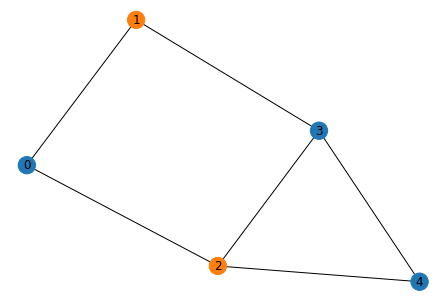

In [5]:
edges = [[0,1],[0,2],[1,3],[2,3],[2,4],[3,4]]

G = nx.Graph()
G.add_edges_from(edges)

solution = [0,1,1,0,0]
colors = ['C%s'%s for s in solution]

nx.draw(G, with_labels=True, node_color = colors)

Let us move now to a more complicated graph. 

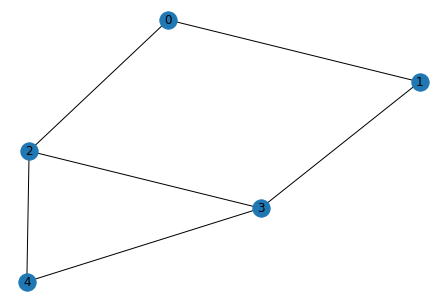

In [6]:
# Introduce your edges here. Make sure that the graph makes sensethey are capitals. If the cities are not in our database, an Error will
# raise in the next cell

# edges = []

G = nx.Graph()
G.add_edges_from(edges)


nx.draw(G, with_labels=True)

In [2]:
# Import some auxiliary packages. Make sure that all packages are installed

import networkx as nx
import numpy as np


Now it is time to define the problem. In particular, the algorithm and provider must be specified. We are in the advent of quantum computing, and thus we will use simulations by now. We use an annealing scheme simulated using the DWave technology.


In [ ]:
# Define the problem

algorithm = "maxcut/dwave/annealing_sim"
provider = "classical"
PAYLOAD_MAXCUT_1 = {
    "problem": "maxcut_problem",
        "data": {
        "edges": edges
    },
    "algorithm": algorithm,
    "provider": provider,
    "arguments": {
    }
}


In [7]:
def login_qapitan():
    response = requests.post(QAPITAN_PUBLIC_API + '/login', data=json.dumps(PAYLOAD_USER))
    response_json = response.json()
    access_token = response_json['access_token']
    header = {'Authorization': 'Bearer ' + access_token}
    return header

def qapitan_maxcut():
    header = login_qapitan()
    response = requests.post(QAPITAN_PUBLIC_API + '/problem/maxcut', data=json.dumps(PAYLOAD_MAXCUT_1), headers=header)
    response_json = response.json()
    return response_json['job']

def get_result(job_name):
    header = login_qapitan()
    response = requests.get(QAPITAN_PUBLIC_API + "/results", headers=header)
    return response.json()

In [ ]:
#WAIT UNTIL FINISHED
job = qapitan_maxcut()
print(job)

In [ ]:
colors = solution
nx.draw(G, with_labels=True, node_color = colors)